# Chris Inspecting

This is where Chris will be conducing any analysis to build off of Alex's work. 

Use this notebook to quickly checkout the wave plot and mel spectogram of downloaded samples.  
Add your cells after the **Explore samples below:** cell. The cells before the **Explore samples below:** cell only need to be run when opening the notebook.  
!!!Changes to this notebook will not be tracked.!!!

## Instructions
display sample metadata with the display_sample_metadata function by passing the sample id.  
Load a sample with the `load_audio_sample` function by passing the sample id as a parameter.  
Pass the returned sample into the show_amplitude_wave_plot function to view the waveplot or the show_mel_spectogram function to view the mel spectogram of the sample

## Example:
```Python
#display metadata
display_sample_metadata(123456789)
#get sample as time series
sample, _ = load_audio_sample(123456789)
'''
New cell >
'''
show_amplitude_wave_plot(sample)
'''
New cell > 
'''
show_mel_spectogram(sample)
```

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import IPython.display as ipd
import os
import json

main_sample_rate = 44100 # 44.1 kHz

samples_metadata = None # dict for species sample info
species_info_df = None # dict with species info

working_dir = os.path.abspath('')

raw_sample_dir = os.path.join(working_dir, 'dataset', 'raw') #path pointing to samples
samples_metadata_file_path = os.path.join(working_dir, 'dataset', 'data_dictionary', 'samples_metadata.json')
species_info_path = os.path.join(working_dir, 'dataset', 'data_dictionary', 'species_info.csv')


Bad key "text.kerning_factor" on line 4 in
/Users/ChristopherKuzemka/opt/anaconda3/envs/DSI_test/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def get_sample_metadata():
    '''
    loads the file that holds information on the downloaded samples and the relevant species
    '''
    with open(samples_metadata_file_path) as f:
        samples_metadata = json.load(f)
    return samples_metadata

In [3]:
def get_species_info():
    '''
    loads the file that holds information on all species
    '''
    species_info_df = pd.read_csv(species_info_path).set_index('species_key')
    return species_info_df

In [4]:
def display_sample_metadata(sample_id):
    '''
    displays the meta data + some additional info on the species in the sample. Takes the sample id as a parameter 
    '''
    if samples_metadata is None:
        raise Exception("sample_meta_data has not been loaded yet. Please run load_sample_meta_data() before this function")
    sample_info = samples_metadata.get(str(sample_id), None)
    if sample_info is None:
        raise Exception("sample with id '{}' was not found in sample_metadata".format(sample_id))
    print('-' * 90)
    print(f"Sample bgifID: {sample_info['gbifID']:>10}")
    print(f"url: {sample_info['recording_link']}")
    print(f"rec time (sec): {sample_info['recording_time_sec']}")
    print(f"rec date: {sample_info['date']}")
    print()
    print(f"decimal latitude: {sample_info['decimal_latitude']}")
    print(f"decimal longitude: {sample_info['decimal_longitude']}")
    main_species_key = sample_info['forefront_bird_key']
    print()
    print(f"main species key: {main_species_key}".format())
    print(f"main scientific name: {species_info_df.at[main_species_key, 'scientific_name']}")
    print(f"main common name: {species_info_df.at[main_species_key, 'common_name']}")
    print()
    if sample_info['behavior']:
        print("Noted behavior in this sample:")
        for index, behavior in enumerate(sample_info['behavior']):
            print(f"\t{str(index)+')'} {behavior}")
    else:
        print("Noted behavior in this sample: None")
    if sample_info['background_birds_keys']:
        print("Background bird's species keys and info:")
        print(f"\t{'':3} {'key':^10} | {'scientific name':30} | {'common_name':30}")
        print(f"\t{'-'*15:^15}┼{'-'*32:32}┼{'-'*30:30}")
        for index, key in enumerate(sample_info['background_birds_keys']):
            print(f"\t{str(index)+')':3} {key:10} | {species_info_df.at[key, 'scientific_name']:30} | {species_info_df.at[key, 'common_name']:30}")
    else:
        print("Background bird's species keys: None")
    print('-' * 90)

In [5]:
def load_audio_sample(sample_id):
    '''
    loads an audio sample by it's id (file name). Returns the audio and the the sample rate
    '''
    audio_file_path = os.path.join(raw_sample_dir, str(sample_id) + '.mp3')
    if not os.path.isfile(audio_file_path): #check if file exists
        raise Exception(f"Sample with id '{sample_id}' does not exist! Available files can be found in the {raw_sample_dir} directory")
    #sample audio at 44.1 khz and get the time series as a numpy array
    time_series, sample_rate = librosa.load(audio_file_path, sr = main_sample_rate)
    #trim empty start and end padding from time series
    time_series, _ = librosa.effects.trim(time_series)

    return time_series, sample_rate

In [6]:
def show_amplitude_wave_plot(sample_time_series):
    '''
    plots the amplitude vs time of the sample 
    '''
    librosa.display.waveplot(sample_time_series, sr=main_sample_rate)

In [7]:
def show_mel_spectogram(sample_time_series):
    '''
    plots the melspectogram of the sample
    '''
    S = librosa.feature.melspectrogram(y=sample_time_series, sr=main_sample_rate, n_mels=128, fmax=10000, center = False)
    plt.figure(figsize=(10, 4))
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time',
                            y_axis='mel', sr=main_sample_rate,
                            fmax=10000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()

In [8]:
def available_audio():
    '''
    Outputs a list of available audio files in a user's raw folder
    '''
    listed_files = os.listdir(raw_sample_dir) #grabs the list of files from raw
    file_names = [] #empty list for appropriate file name outputs

    for _, file_name in enumerate(listed_files):
        file_name = file_name.replace('.mp3', '')
        file_names.append(file_name)

    return file_names

In [11]:
samples_metadata = get_sample_metadata()
species_info_df = get_species_info()
raw_names = available_audio()

## Metadata Exploration

In [13]:
species_info_df.columns

Index(['common_name', 'scientific_name', 'genus_key', 'forefront_recordings',
       'background_recordings'],
      dtype='object')

## Explore samples

In [14]:
display_sample_metadata(raw_names[0])

------------------------------------------------------------------------------------------
Sample bgifID: 2243804495
url: https://www.xeno-canto.org/sounds/uploaded/ZNCDXTUOFL/Bonasia_bonasia_Bialowieza_Poland_Jarek_Matusiak_20091205.mp3
rec time (sec): 14
rec date: 2009-12-05

decimal latitude: 52.7001
decimal longitude: 23.8501

main species key: 2473663
main scientific name: tetrastes bonasia
main common name: hazel grouse

Noted behavior in this sample:
	0) call
Background bird's species keys: None
------------------------------------------------------------------------------------------


In [15]:
sample1, _ = load_audio_sample(raw_names[0])

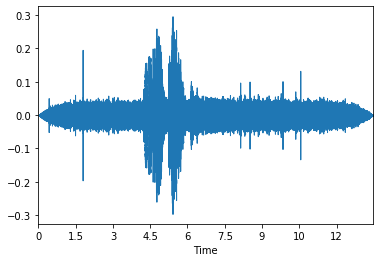

In [16]:
show_amplitude_wave_plot(sample1)